In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

dataset = 'Nfl_data.csv'

df = pd.read_csv(dataset)
print('last 5 rows', df.tail())
print(df.columns.str.strip())
print(df[['game_date', 'home_team', 'away_team', 'home_points_for', 'away_points_for']].tail(20))


last 5 rows       season  week          game_id   game_date home_team away_team  \
3020    2025     1  2025_01_NYG_WAS  2025-09-07       WAS       NYG   
3021    2025     1  2025_01_PIT_NYJ  2025-09-07       NYJ       PIT   
3022    2025     1   2025_01_SF_SEA  2025-09-07       SEA        SF   
3023    2025     1   2025_01_TB_ATL  2025-09-07       ATL        TB   
3024    2025     1  2025_01_TEN_DEN  2025-09-07       DEN       TEN   

      home_points_for  away_points_for  point_diff winner  ...  \
3020             21.0              6.0        15.0    WAS  ...   
3021             32.0             34.0        -2.0    PIT  ...   
3022             13.0             17.0        -4.0     SF  ...   
3023             20.0             23.0        -3.0     TB  ...   
3024             20.0             12.0         8.0    DEN  ...   

      home_prior_pf_avg_3  home_prior_pf_avg_5  home_prior_win_pct_3  \
3020            30.333333                 28.8              0.666667   
3021            18.3

In [10]:
# sort by date
df = df.sort_values(by='game_date')
print(df[['game_date', 'home_team', 'away_team', 'home_points_for', 'away_points_for']].tail(20))
df.to_csv('Nfl_data_sorted.csv', index=False)



       game_date home_team away_team  home_points_for  away_points_for
3003  2025-01-19       BUF       BAL             27.0             25.0
3005  2025-01-19       PHI       LAR             28.0             22.0
3007  2025-01-26        KC       BUF             32.0             29.0
3008  2025-01-26       PHI       WAS             55.0             23.0
3009  2025-02-09       PHI        KC             40.0             22.0
3014  2025-09-04       PHI       DAL             24.0             20.0
3017  2025-09-05       LAC        KC             27.0             21.0
3013  2025-09-07       CLE       CIN             16.0             17.0
3016  2025-09-07       LAR       HOU             14.0              9.0
3015  2025-09-07        GB       DET             27.0             13.0
3023  2025-09-07       ATL        TB             20.0             23.0
3010  2025-09-07        NO       ARI             13.0             20.0
3011  2025-09-07       BUF       BAL             41.0             40.0
3019  

In [13]:
TEAMS = df['home_team'].unique()


Available columns: ['season', 'week', 'game_id', 'home_team', 'away_team', 'home_points_for', 'away_points_for', 'point_diff', 'winner', 'home_prior_pa_avg_3', 'home_prior_pa_avg_5', 'home_prior_pf_avg_3', 'home_prior_pf_avg_5', 'home_prior_win_pct_3', 'home_prior_win_pct_5', 'away_prior_pa_avg_3', 'away_prior_pa_avg_5', 'away_prior_pf_avg_3', 'away_prior_pf_avg_5', 'away_prior_win_pct_3', 'away_prior_win_pct_5']
Data shape: (3025, 21)


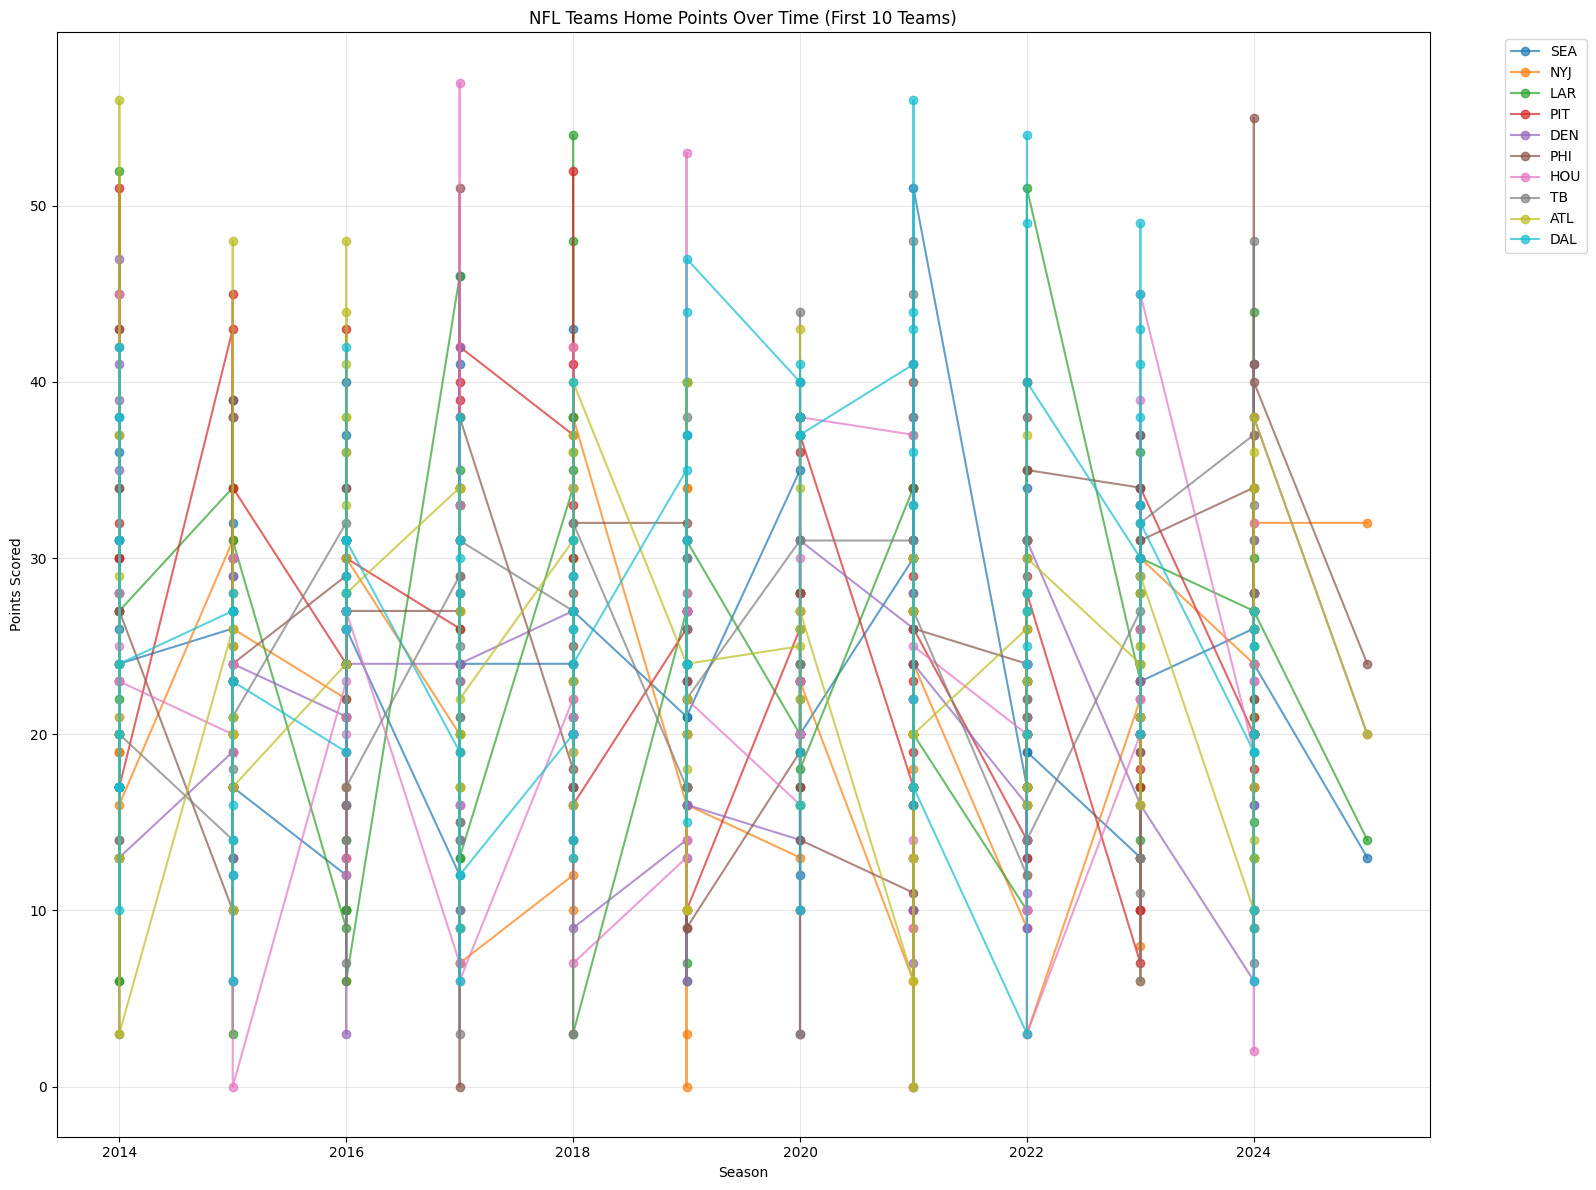

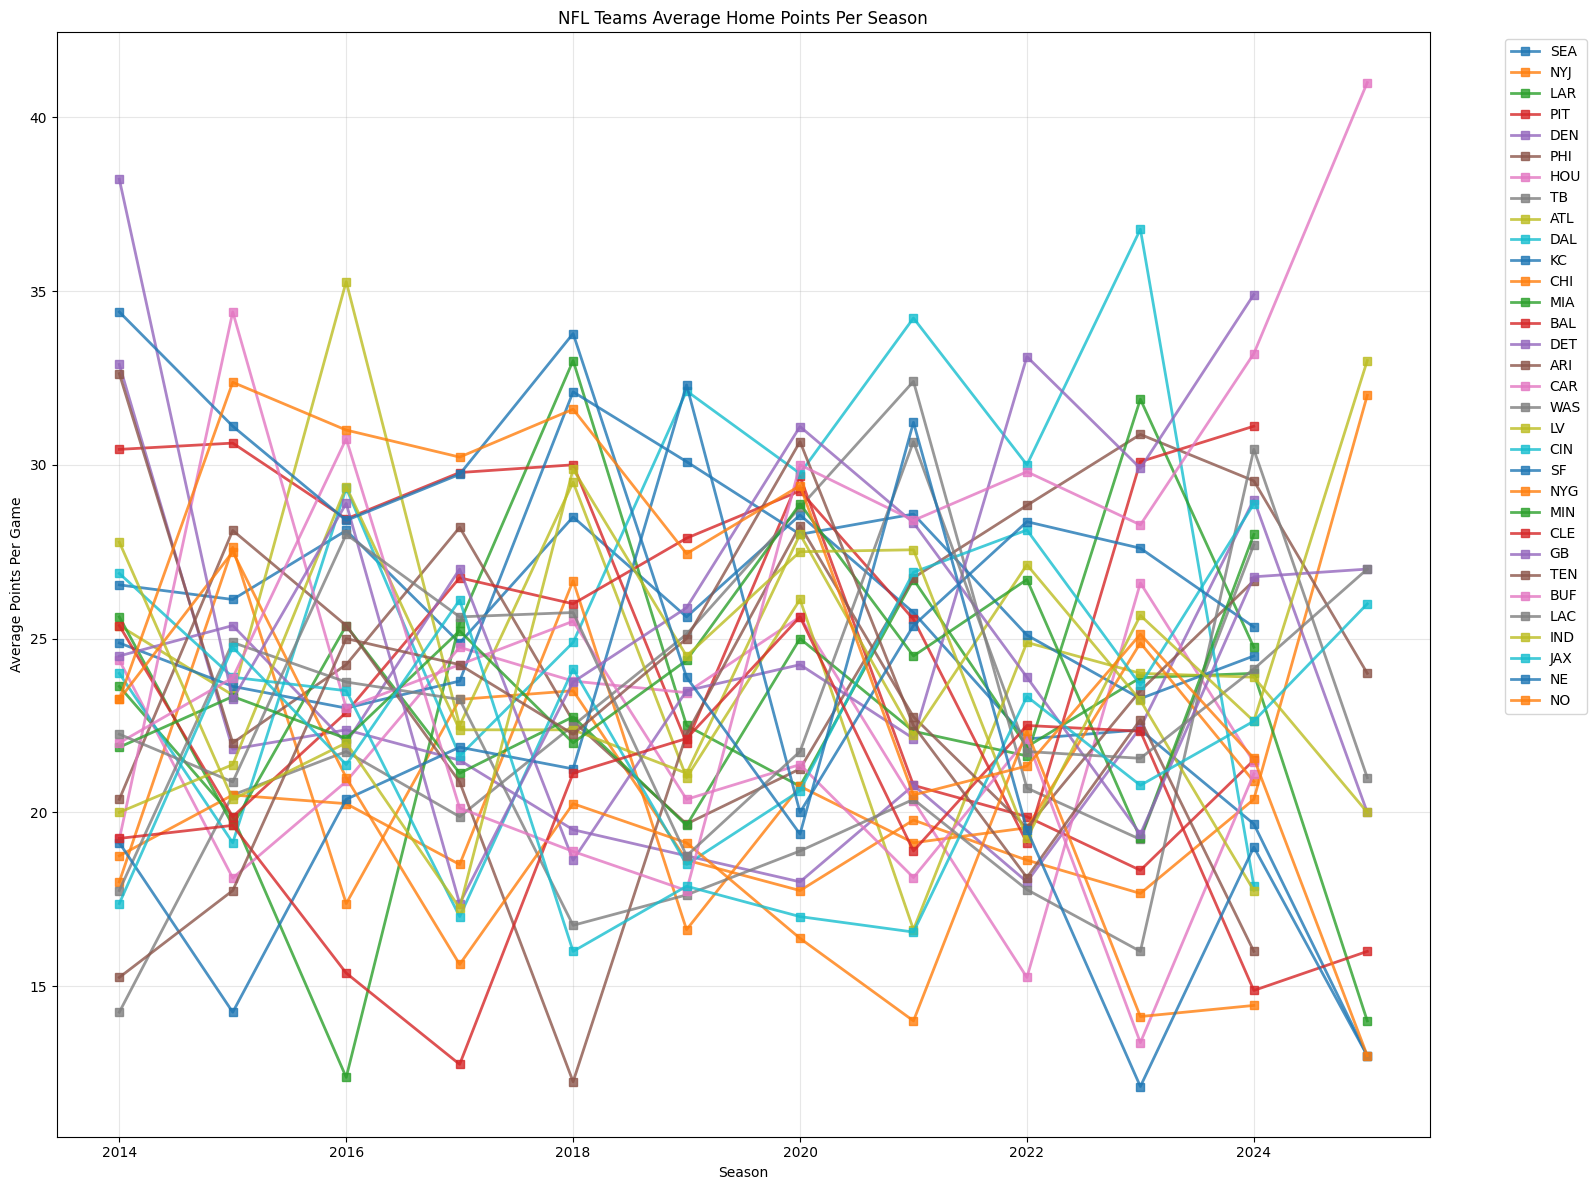

Top 10 teams with above-average home scoring over multiple seasons:
DAL: 27.25
BUF: 27.00
GB: 26.15
KC: 26.08
DET: 25.94
PHI: 25.88
BAL: 25.81
PIT: 25.59
NO: 25.57
IND: 24.78


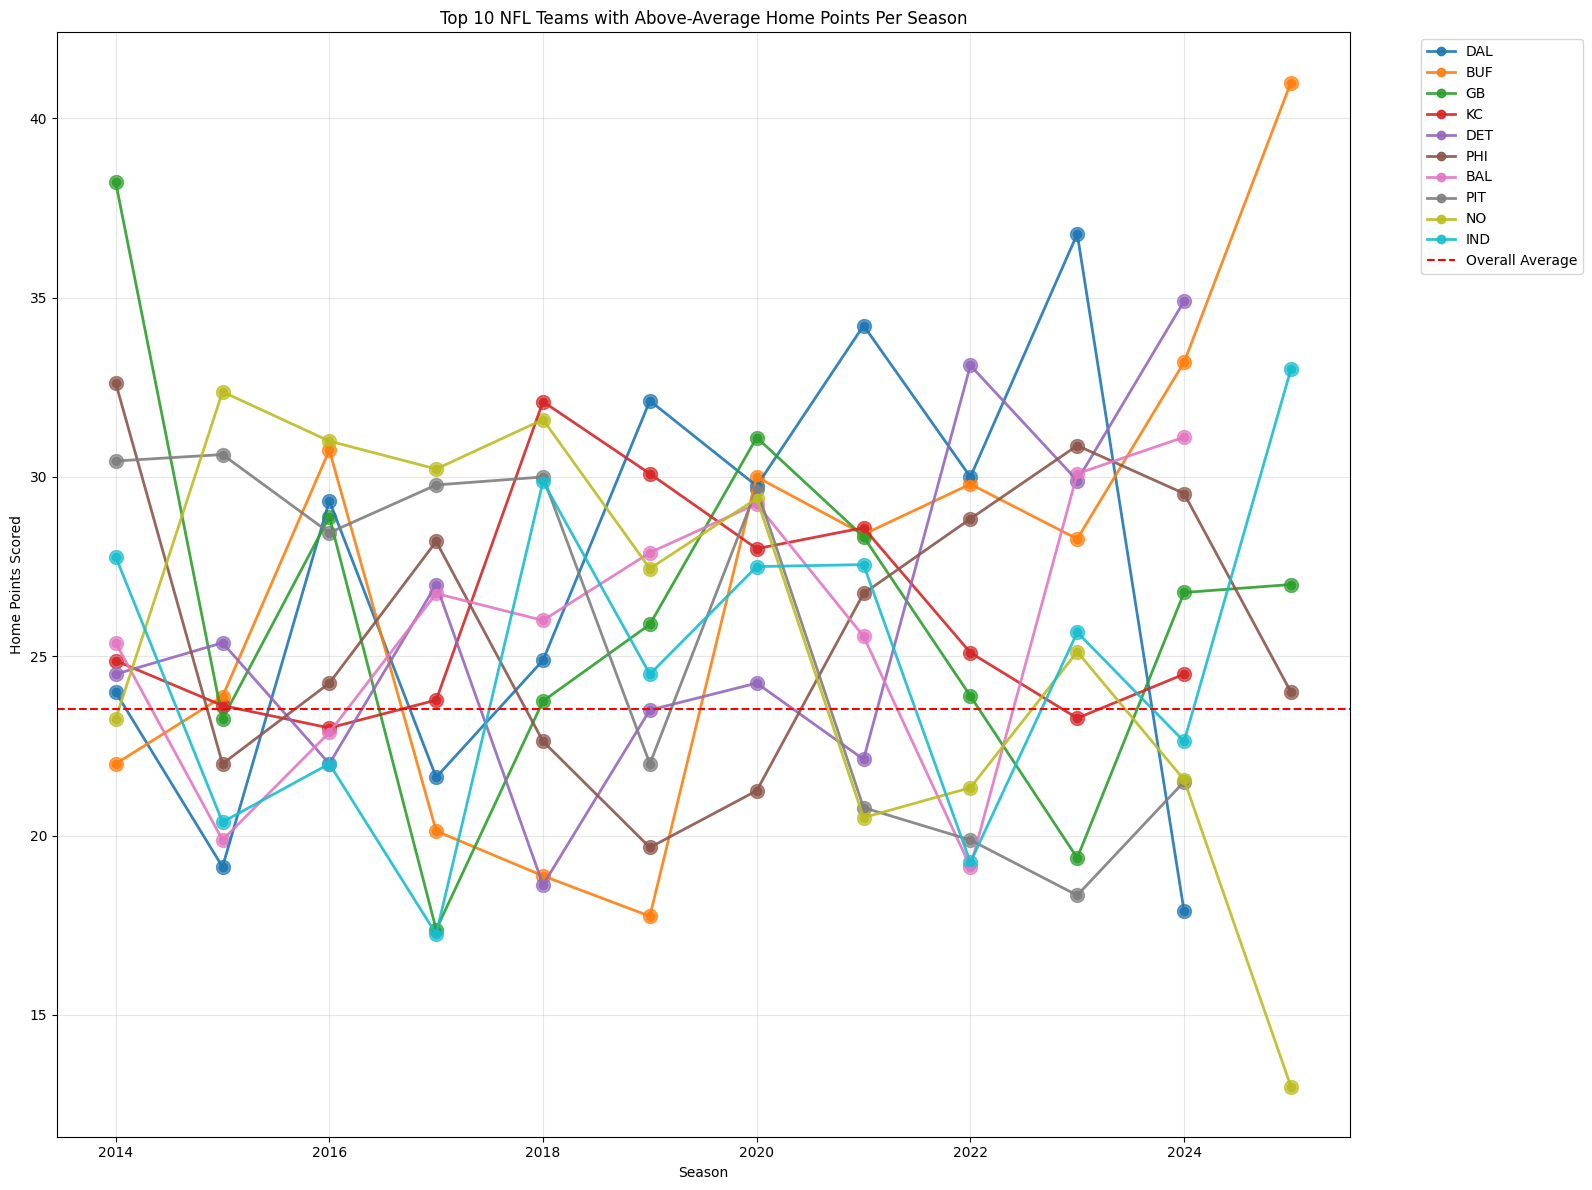

In [22]:
# Check available columns first
print("Available columns:", df.columns.tolist())
print("Data shape:", df.shape)

# TIME SERIES - Each team's home points over time
plt.figure(figsize=(16, 12))
for team in TEAMS[:10]:  # Plot first 10 teams to avoid overcrowding
    team_data = df[df['home_team'] == team].copy()
    if len(team_data) > 0:
        # Sort by season and week if available, otherwise use index
        if 'season' in df.columns:
            team_data = team_data.sort_values(['season', 'week'] if 'week' in df.columns else ['season'])
            x_values = team_data['season']
            x_label = 'Season'
        else:
            x_values = range(len(team_data))
            x_label = 'Game Number'
        
        # Use correct column name for points
        points_col = 'home_points_for' if 'home_points_for' in df.columns else 'points_for'
        plt.plot(x_values, team_data[points_col], label=team, marker='o', alpha=0.7)

plt.title('NFL Teams Home Points Over Time (First 10 Teams)')
plt.xlabel(x_label)
plt.ylabel('Points Scored')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Second plot - All teams with average points per season
if 'season' in df.columns:
    plt.figure(figsize=(16, 12))
    
    # Calculate average points per team per season
    points_col = 'home_points_for' if 'home_points_for' in df.columns else 'points_for'
    team_season_avg = df.groupby(['home_team', 'season'])[points_col].mean().reset_index()
    
    for team in TEAMS[:]:  # Plot more teams for season averages
        team_data = team_season_avg[team_season_avg['home_team'] == team]
        if len(team_data) > 0:
            plt.plot(team_data['season'], team_data[points_col], 
                    label=team, marker='s', alpha=0.8, linewidth=2)
    
    
    plt.title('NFL Teams Average Home Points Per Season')
    plt.xlabel('Season')
    plt.ylabel('Average Points Per Game')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No 'season' column found - skipping season average plot")
    
# Calculate overall average home points across all teams and seasons
overall_avg = team_season_avg['home_points_for'].mean()

# Calculate each team's average home points over seasons
team_avg_scores = team_season_avg.groupby('home_team')['home_points_for'].mean()

# Filter teams with above-average scoring
above_avg_teams = team_avg_scores[team_avg_scores > overall_avg]

# Get top 10 teams sorted by their average score (descending)
top_10_teams = above_avg_teams.sort_values(ascending=False).head(10)

# Print the list
print("Top 10 teams with above-average home scoring over multiple seasons:")
for team, avg_score in top_10_teams.items():
    print(f"{team}: {avg_score:.2f}")


# plot the top 10 teams with above-average scoring line plot and scatterplot
plt.figure(figsize=(16, 12))
for team in top_10_teams.index:
    team_data = team_season_avg[team_season_avg['home_team'] == team]
    if len(team_data) > 0:
        plt.plot(team_data['season'], team_data['home_points_for'], 
                 label=team, marker='o', alpha=0.9, linewidth=2)
        plt.scatter(team_data['season'], team_data['home_points_for'], s=100, alpha=0.7)
plt.axhline(overall_avg, color='red', linestyle='--', label='Overall Average')
plt.title('Top 10 NFL Teams with Above-Average Home Points Per Season')
plt.xlabel('Season')
plt.ylabel('Home Points Scored')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [23]:
import nfl_data_py as nfl


In [ ]:
schedule =nfl.import_schedules([2025, 2026])
print(schedule.head(20))

dff = pd.read_csv('team_descriptions.csv')

team_desc = dff[['team_logo_espn', 'team_id', 'team_abbr', 'team_name']].copy()




              game_id  season game_type  week     gameday   weekday gametime  \
6991  2025_01_DAL_PHI    2025       REG     1  2025-09-04  Thursday    20:20   
6992   2025_01_KC_LAC    2025       REG     1  2025-09-05    Friday    20:00   
6993   2025_01_TB_ATL    2025       REG     1  2025-09-07    Sunday    13:00   
6994  2025_01_CIN_CLE    2025       REG     1  2025-09-07    Sunday    13:00   
6995  2025_01_MIA_IND    2025       REG     1  2025-09-07    Sunday    13:00   
6996  2025_01_CAR_JAX    2025       REG     1  2025-09-07    Sunday    13:00   
6997    2025_01_LV_NE    2025       REG     1  2025-09-07    Sunday    13:00   
6998   2025_01_ARI_NO    2025       REG     1  2025-09-07    Sunday    13:00   
6999  2025_01_PIT_NYJ    2025       REG     1  2025-09-07    Sunday    13:00   
7000  2025_01_NYG_WAS    2025       REG     1  2025-09-07    Sunday    13:00   
7001  2025_01_TEN_DEN    2025       REG     1  2025-09-07    Sunday    16:05   
7002   2025_01_SF_SEA    2025       REG 